-5244.00000000, 2982.00000000
131224.81250000, -84692.40625000
-731977.87500000, 544530.50000000
1598440.25000000, -1389740.87500000
-1903705.50000000, 1942775.75000000
1500016.00000000, -1783762.12500000
-868084.00000000, 1183001.37500000
389433.75000000, -599109.87500000
-140302.95312500, 239667.98437500
41331.88671875, -78190.48437500
-10358.96191406, 20882.45898438
2046.84875488, -4962.65917969
-497.93283081, 763.02874756
-46.64151382, -327.57843018
-116.51888275, -147.06414795
-106.99015045, -173.26783752
-108.14321136, -169.90480042
-108.01855469, -170.28915405
-108.03066254, -170.24978638
-108.02960968, -170.25341797
-108.02969360, -170.25312805
-108.02967834, -170.25314331
-108.02967834, -170.25314331
-108.02967834, -170.25314331
-108.02967834, -170.25314331
-108.02967834, -170.25314331
-108.02967834, -170.25314331
-108.02967834, -170.25314331
-108.02967834, -170.25314331
-108.02967834, -170.25314331
sin_1(12, -6, 30, Float32) = (-108.02968f0, -170.25314f0)



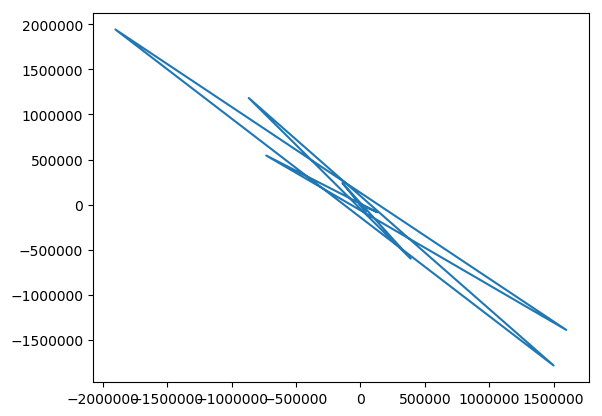

(59.611057f0, -192.70393f0)

In [ ]:
function mnoz(x1, y1, x2, y2)
    return x1 * x2 - y1 * y2, x1 * y2 + x2 * y1
end

using PyPlot
xPlot = Float32[]
yPlot = Float32[]

function sin_1(x, y, t, prec)
    x = prec(x)
    y = prec(y)
    as = a = prec(1)
    bs = b = prec(x)
    cs = c = prec(1)
    ds = d = prec(y)
    for i = 1:t
        a = - a * prec(x) / prec(2  * i - 1) * prec(x) / prec(2 * i)
        b = - b * prec(x) / prec(2 * i) * prec(x) / prec(2 * i + 1)
        c = c * prec(y) / prec(2  * i - 1) * prec(y) / prec(2 * i)
        d = d * prec(y) / prec(2 * i) * prec(y) / prec(2 * i + 1)
        as += a
        bs += b
        cs += c
        ds += d
        @printf "%.8f, %.8f\n" cs * bs as * ds
        
        push!(xPlot, cs * bs)
        push!(yPlot, as * ds)
    end
    return cs * bs, as * ds
end

@show sin_1(12, -6, 30, Float32)
plot(xPlot, yPlot)
print("\n")
@show sin_1(0.3, -6, 30, Float32)

In [ ]:
prec = Float32


function square(x)
    return x * x
end
# Funkcja obliczająca szybko kolejne potęgi. Zachowuje precyzję x (typ x = typ wartości zwracanej)
function power(x, n)
    if n > 0
        if n & 1 == 1
            return square(power(x, n>>=1)) * x
        else 
            return square(power(x, n>>=1))
        end
    else 
        return 1
    end
end

# Funkcja obliczająca wartość symbolu newtona
function newton(n, k)
    if n < k return 0 end
    if k < 0 return 0 end
    Σ = prec(1)
    for i = 1:(n-k)
         Σ = Σ * (i + k) / i
    end
    return Σ
end

# Funkcja obliczająca sinusa z liczby rzeczywistej x korzystając
# z rozwinięcia w szereg Taylora długości n
function sin_real(x, n)
    x = prec(x)
    _x = prec(x) 
    Σ = prec(x)
    for i = 1:n
        _x = - _x * x / (2 * i) * x / (2 * i + 1)
        Σ += _x
    end
    return Σ
end

# Funkcja obliczająca cosinusa z liczby rzeczywistej x korzystając
# z rozwinięcia w szereg Taylora długości n
function cos_real(x, n)
    x = prec(x)
    _x = prec(1)
    Σ = prec(1)
    for i = 1:n
        _x = prec(- _x  * x / (2i - 1) * x / (2i))
        Σ += _x
    end
    return Σ
end

function sin_nx(nx, n, iters)
    Σ = prec(0)
    x = prec(nx) / prec(n)
    cos = cos_real(x, iters)
    sin = sin_real(x, iters)
    for i = 0:div(n, 2)
        Σ += (i % 2 == 0 ? 1 : -1) * newton(n, 2 * i + 1) * power(cos, n - 2 * i - 1) * power(sin, 2 * i + 1)
    end
    return Σ
end

function cos_nx(nx, n, iters)
    Σ = prec(0)
    x = prec(nx) / prec(n)
    cos = cos_real(x, iters)
    sin = sin_real(x, iters)
    for i = 0:div(n, 2)
        Σ += (i % 2 == 0 ? 1 : -1) * newton(n, 2 * i) * power(cos, n - 2 * i) * power(sin, 2 * i)
    end
    return Σ
end

function sin_2x(nx, iters)
    x = prec(nx) / 2
    cos = cos_real(x, iters)
    sin = sin_real(x, iters)
    return 2 * cos * sin
end

function cos_2x(nx, iters)
    x = prec(nx) / 2
    cos = cos_real(x, iters)
    sin = sin_real(x, iters)
    return cos * cos - sin * sin
end

q = prec(3.1415926535 / 151)
@show q
@show sin_real(q, 20)
@show sin_2x(q, 20)
@show sin_nx(q, 10, 20)
@show Float64(q)
@show sin(Float64(q))

5.61450005, -40.11000061
21.57297707, -102.03004456
40.72268677, -155.09205627
53.03321838, -181.62310791
57.95742798, -190.30599976
59.30039597, -192.30975342
59.56603622, -192.65325928
59.60588455, -192.69871521
59.61057663, -192.70350647
59.61101532, -192.70390320
59.61105347, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
59.61105728, -192.70393372
sin_1(0.3, -6, 30, Float32) = (59.611057f0, -192.70393f0)
q = 0.020805249f0
sin_real(q, 20) = 0.020803748f0
sin_2x(q, 20) = 0.020803748f0
sin_nx(q, 10, 20) = 0.020803753f0
Float64(q) = 0.02080

0.020803748068724755

In [55]:
setprecision(BigFloat, 128)

function ilosc_cyfr(x)
    ilosc = 0
    while x > 0
        ilosc = ilosc + 1
        x = x / 10
    end
    
    return ilosc
end

function msqrt(x, iter)
    start = x / 2 # can be slightly imroved using #  10^ilosc_cyfr(x)
    
    x_n = BigFloat(start)
    for i = 0:iter
       x_n = 1/2 * (x_n + x/x_n)
    end
    
    return x_n
end

function sincos(iter)
    cn = -1 # cos pi
    sn = 0 # sin pi
    
    for i = 0:iter
        cn = msqrt((1 + cn)/2, 1000)
        sn = msqrt((1 - sn)/2, 1000)
    end
    
    @show cn
    @show sn
end

function rozwiniecie_binarne(x)
    ulam = BigFloat(x)
    t = Int32[]
    
    for i = 1:1000
        if ulam == 0
            @printf "1"
            break
        end
            
        ulam = ulam * 2
        if (ulam >= 1)
            ulam = ulam - 1
            push!(t, 1)
            @printf "%lf \t 1 \t %d\n" ulam i
        else
            push!(t, 0)
            @printf "%lf \t 0 \t %d\n" ulam i
        end
    end
    
    return t
end

# t jest rozwinieciem binarnym α/pi
function ograniczenie(t, maxiter)
    Σ = BigFloat(0)
    l = length(t)
    for i = 1:l
        Σ = Σ + t[i] * π/(2^i)
    end
    
    return sin(Σ), sin(Σ + π/(2^l))
end
    
@show msqrt(5, 1000)

@show sincos(100)

α = 1
t = rozwiniecie_binarne(α/π)

nr = ograniczenie(t, 0)
@show nr

msqrt(5, 1000) = 2.23606797749978969640917366873127623544
cn = BigFloat(NaN, 128)
sn = 5.000000000000000000000000000001788544277e-01
sincos(100) = 5.000000000000000000000000000001788544277e-01
0.636620 	 0 	 1
0.273240 	 1 	 2
0.546479 	 0 	 3
0.092958 	 1 	 4
0.185916 	 0 	 5
0.371833 	 0 	 6
0.743665 	 0 	 7
0.487331 	 1 	 8
0.974662 	 0 	 9
0.949323 	 1 	 10
0.898647 	 1 	 11
0.797294 	 1 	 12
0.594588 	 1 	 13
0.189175 	 1 	 14
0.378350 	 0 	 15
0.756701 	 0 	 16
0.513402 	 1 	 17
0.026804 	 1 	 18
0.053608 	 0 	 19
0.107215 	 0 	 20
0.214430 	 0 	 21
0.428860 	 0 	 22
0.857720 	 0 	 23
0.715441 	 1 	 24
0.430882 	 1 	 25
0.861763 	 0 	 26
0.723527 	 1 	 27
0.447054 	 1 	 28
0.894108 	 0 	 29
0.788216 	 1 	 30
0.576432 	 1 	 31
0.152863 	 1 	 32
0.305727 	 0 	 33
0.611453 	 0 	 34
0.222906 	 1 	 35
0.445812 	 0 	 36
0.891624 	 0 	 37
0.783249 	 1 	 38
0.566498 	 1 	 39
0.132996 	 1 	 40
0.265991 	 0 	 41
0.531982 	 0 	 42
0.063965 	 1 	 43
0.127930 	 0 	 44
0.255859 	 0 	 45
0.5117

(8.414709848078965189933677744846472092166e-01, 8.41470984807896613218537376430072257403e-01)

<h2>Test #1</h2>
Sprawdzamy, dla jakiego n skracanie przedziału \[0, &pi;/2) korzystając ze wzoru na sinus zwielokrotnionego kąta ma sens.

In [ ]:
tests = [Float32(0.321563716), Float32(0.034321248), Float32(1.0523452), Float32(0.00000123456), Float32(1.000003123)]
range = 10000
max_n = 30
prec = Float32

using PyPlot
xPlot = Float32[]
yPlot = Float32[]

for k = 1:max_n
    Σ² = 0
    for i = 1:5
    curr_test = tests[i]
        for j = 1:range
            curr_test = nextfloat(curr_test)
            target = sin(Float64(curr_test))
            Δ = target - sin_nx(curr_test, k, 10)
            Σ² += Δ * Δ
        end
    end
    @printf "n = %d, σ = %e \n" k sqrt(Σ² / range)
    push!(xPlot, k)
    push!(yPlot, sqrt(Σ² / range))
end

plot(xPlot, yPlot)